In [1]:
import os
import pandas as pd
path = r"C:\Users\Wong\Desktop\Dissertation\Imputed_dataset"

Acomb_water = pd.read_csv(os.path.join(path, 'Acomb_water.csv'))
Acomb_rainfall = pd.read_csv(os.path.join(path, 'Acomb_rainfall.csv'))

In [2]:
Acomb_water['dateTime'] = pd.to_datetime(Acomb_water['dateTime'])
Acomb_rainfall['dateTime'] = pd.to_datetime(Acomb_rainfall['dateTime'])

In [3]:
Acomb_water.set_index('dateTime', inplace=True)
Acomb_rainfall.set_index('dateTime', inplace=True)

In [4]:
start_date = pd.to_datetime('01/01/2017 00:00:00', format='%d/%m/%Y %H:%M:%S')
end_date = pd.to_datetime('31/12/2020 00:00:00', format='%d/%m/%Y %H:%M:%S')
Acomb_water_subset = Acomb_water.loc[(Acomb_water.index >= start_date) & (Acomb_water.index <= end_date)]
Acomb_rainfall_subset = Acomb_rainfall.loc[(Acomb_rainfall.index >= start_date) & (Acomb_rainfall.index <= end_date)]

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import tensorflow as tf
from keras import Model
from keras.callbacks import EarlyStopping
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [6]:
merged_data = pd.merge(Acomb_rainfall_subset, Acomb_water_subset, on='dateTime', how='inner')

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
merged_data = scaler.fit_transform(merged_data)

In [9]:
train_data = merged_data[:90136]
test_data = merged_data[90136:]

In [10]:
window_size = 96
future_steps = 48

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

In [13]:
Ridge_acomb_96in_48out = Ridge()
cv_scores_acomb_96in_48out_Ridge = cross_val_score(Ridge_acomb_96in_48out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [14]:
cv_scores_acomb_96in_48out_Ridge = -cv_scores_acomb_96in_48out_Ridge
print("Cross-validation scores:")
print(cv_scores_acomb_96in_48out_Ridge)
print("Mean MSE:", cv_scores_acomb_96in_48out_Ridge.mean())
print("Standard Deviation MSE:", cv_scores_acomb_96in_48out_Ridge.std())

Cross-validation scores:
[0.00086242 0.00244141 0.00028667 0.00029711 0.00121057]
Mean MSE: 0.0010196355863767003
Standard Deviation MSE: 0.0007927047977856095


In [15]:
window_size = 48
future_steps = 48

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [17]:
Ridge_acomb_48in_48out = Ridge()
cv_scores_acomb_48in_48out_Ridge = cross_val_score(Ridge_acomb_48in_48out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
cv_scores_acomb_48in_48out_Ridge = -cv_scores_acomb_48in_48out_Ridge
print("Cross-validation scores:")
print(cv_scores_acomb_48in_48out_Ridge)
print("Mean MSE:", cv_scores_acomb_48in_48out_Ridge.mean())
print("Standard Deviation MSE:", cv_scores_acomb_48in_48out_Ridge.std())

Cross-validation scores:
[0.00097473 0.00247845 0.00034192 0.00030377 0.00124182]
Mean MSE: 0.0010681368927699692
Standard Deviation MSE: 0.0007924051809962079


In [18]:
window_size = 24
future_steps = 48

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [20]:
Ridge_acomb_24in_48out = Ridge()
cv_scores_acomb_24in_48out_Ridge = cross_val_score(Ridge_acomb_24in_48out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
cv_scores_acomb_24in_48out_Ridge = -cv_scores_acomb_24in_48out_Ridge
print("Cross-validation scores:")
print(cv_scores_acomb_24in_48out_Ridge)
print("Mean MSE:", cv_scores_acomb_24in_48out_Ridge.mean())
print("Standard Deviation MSE:", cv_scores_acomb_24in_48out_Ridge.std())

Cross-validation scores:
[0.00104154 0.00251017 0.00040098 0.00032149 0.00126933]
Mean MSE: 0.0011087035502791425
Standard Deviation MSE: 0.0007893040216388244


In [21]:
window_size = 96
future_steps = 32

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [23]:
Ridge_acomb_96in_32out = Ridge()
cv_scores_acomb_96in_32out_Ridge = cross_val_score(Ridge_acomb_96in_32out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
cv_scores_acomb_96in_32out_Ridge = -cv_scores_acomb_96in_32out_Ridge
print("Cross-validation scores:")
print(cv_scores_acomb_96in_32out_Ridge)
print("Mean MSE:", cv_scores_acomb_96in_32out_Ridge.mean())
print("Standard Deviation MSE:", cv_scores_acomb_96in_32out_Ridge.std())

Cross-validation scores:
[0.00049148 0.00162638 0.00019383 0.00016465 0.00077786]
Mean MSE: 0.000650838978018254
Standard Deviation MSE: 0.0005363686061372996


In [24]:
window_size = 48
future_steps = 32

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [26]:
Ridge_acomb_48in_32out = Ridge()
cv_scores_acomb_48in_32out_Ridge = cross_val_score(Ridge_acomb_48in_32out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
cv_scores_acomb_48in_32out_Ridge = -cv_scores_acomb_48in_32out_Ridge
print("Cross-validation scores:")
print(cv_scores_acomb_48in_32out_Ridge)
print("Mean MSE:", cv_scores_acomb_48in_32out_Ridge.mean())
print("Standard Deviation MSE:", cv_scores_acomb_48in_32out_Ridge.std())

Cross-validation scores:
[0.00055479 0.00163888 0.00022862 0.00016848 0.00079098]
Mean MSE: 0.0006763500538209307
Standard Deviation MSE: 0.0005315597625958163


In [27]:
window_size = 24
future_steps = 32

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [29]:
Ridge_acomb_24in_32out = Ridge()
cv_scores_acomb_24in_32out_Ridge = cross_val_score(Ridge_acomb_24in_32out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
cv_scores_acomb_24in_32out_Ridge = -cv_scores_acomb_24in_32out_Ridge
print("Cross-validation scores:")
print(cv_scores_acomb_24in_32out_Ridge)
print("Mean MSE:", cv_scores_acomb_24in_32out_Ridge.mean())
print("Standard Deviation MSE:", cv_scores_acomb_24in_32out_Ridge.std())

Cross-validation scores:
[0.00059356 0.00164097 0.00025717 0.00017976 0.00080605]
Mean MSE: 0.0006955001525597172
Standard Deviation MSE: 0.0005243361637664501


In [30]:
window_size = 96
future_steps = 16

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [32]:
Ridge_acomb_96in_16out = Ridge()
cv_scores_acomb_96in_16out_Ridge = cross_val_score(Ridge_acomb_96in_16out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
cv_scores_acomb_96in_16out_Ridge = -cv_scores_acomb_96in_16out_Ridge
print("Cross-validation scores:")
print(cv_scores_acomb_96in_16out_Ridge)
print("Mean MSE:", cv_scores_acomb_96in_16out_Ridge.mean())
print("Standard Deviation MSE:", cv_scores_acomb_96in_16out_Ridge.std())

Cross-validation scores:
[1.96591507e-04 6.56985333e-04 1.07531273e-04 6.72757256e-05
 2.66741507e-04]
Mean MSE: 0.00025902506920564303
Standard Deviation MSE: 0.00021073587535485236


In [33]:
window_size = 48
future_steps = 16

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [35]:
Ridge_acomb_48in_16out = Ridge()
cv_scores_acomb_48in_16out_Ridge = cross_val_score(Ridge_acomb_48in_16out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
cv_scores_acomb_48in_16out_Ridge = -cv_scores_acomb_48in_16out_Ridge
print("Cross-validation scores:")
print(cv_scores_acomb_48in_16out_Ridge)
print("Mean MSE:", cv_scores_acomb_48in_16out_Ridge.mean())
print("Standard Deviation MSE:", cv_scores_acomb_48in_16out_Ridge.std())

Cross-validation scores:
[2.16559209e-04 6.51706924e-04 1.20089437e-04 6.85847839e-05
 2.69160348e-04]
Mean MSE: 0.00026522014036309537
Standard Deviation MSE: 0.00020566177554876558


In [36]:
window_size = 24
future_steps = 16

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [38]:
Ridge_acomb_24in_16out = Ridge()
cv_scores_acomb_24in_16out_Ridge = cross_val_score(Ridge_acomb_24in_16out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
cv_scores_acomb_24in_16out_Ridge = -cv_scores_acomb_24in_16out_Ridge
print("Cross-validation scores:")
print(cv_scores_acomb_24in_16out_Ridge)
print("Mean MSE:", cv_scores_acomb_24in_16out_Ridge.mean())
print("Standard Deviation MSE:", cv_scores_acomb_24in_16out_Ridge.std())

Cross-validation scores:
[2.21579445e-04 6.54690329e-04 1.24943291e-04 7.11304454e-05
 2.76889292e-04]
Mean MSE: 0.0002698465606941061
Standard Deviation MSE: 0.0002054113397614627


In [39]:
window_size = 96
future_steps = 8

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [41]:
Ridge_acomb_96in_8out = Ridge()
cv_scores_acomb_96in_8out_Ridge = cross_val_score(Ridge_acomb_96in_8out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
cv_scores_acomb_96in_8out_Ridge = -cv_scores_acomb_96in_8out_Ridge
print("Cross-validation scores:")
print(cv_scores_acomb_96in_8out_Ridge)
print("Mean MSE:", cv_scores_acomb_96in_8out_Ridge.mean())
print("Standard Deviation MSE:", cv_scores_acomb_96in_8out_Ridge.std())

Cross-validation scores:
[8.05160952e-05 2.11731992e-04 5.59798451e-05 3.10968245e-05
 8.18068608e-05]
Mean MSE: 9.222632359899202e-05
Standard Deviation MSE: 6.25746312500383e-05


In [42]:
window_size = 48
future_steps = 8

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [44]:
Ridge_acomb_48in_8out = Ridge()
cv_scores_acomb_48in_8out_Ridge = cross_val_score(Ridge_acomb_48in_8out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
cv_scores_acomb_48in_8out_Ridge = -cv_scores_acomb_48in_8out_Ridge
print("Cross-validation scores:")
print(cv_scores_acomb_48in_8out_Ridge)
print("Mean MSE:", cv_scores_acomb_48in_8out_Ridge.mean())
print("Standard Deviation MSE:", cv_scores_acomb_48in_8out_Ridge.std())

Cross-validation scores:
[8.51953290e-05 2.06903025e-04 5.99828580e-05 3.12746886e-05
 8.20196521e-05]
Mean MSE: 9.307511044019108e-05
Standard Deviation MSE: 6.009242456012576e-05


In [45]:
window_size = 24
future_steps = 8

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [47]:
Ridge_acomb_24in_8out = Ridge()
cv_scores_acomb_24in_8out_Ridge = cross_val_score(Ridge_acomb_24in_8out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
cv_scores_acomb_24in_8out_Ridge = -cv_scores_acomb_24in_8out_Ridge
print("Cross-validation scores:")
print(cv_scores_acomb_24in_8out_Ridge)
print("Mean MSE:", cv_scores_acomb_24in_8out_Ridge.mean())
print("Standard Deviation MSE:", cv_scores_acomb_24in_8out_Ridge.std())

Cross-validation scores:
[8.61904645e-05 2.08260764e-04 6.08716558e-05 3.15751570e-05
 8.43212175e-05]
Mean MSE: 9.424385178011152e-05
Standard Deviation MSE: 6.0339441165857114e-05


In [ ]:
cv_scores_acomb_96in_48out_Ridge

In [55]:
window_size = 96
future_steps = 48

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [56]:
Ridge_acomb_96in_48out = Ridge()
Ridge_acomb_96in_48out.fit(X_train, y_train)

Ridge()

In [60]:
pred_Ridge_acomb_96in_48out = Ridge_acomb_96in_48out.predict(X_test)

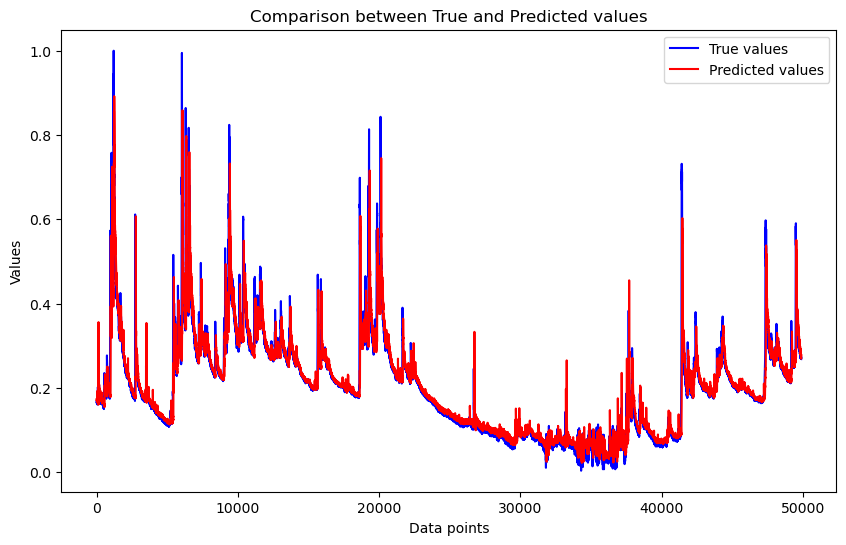

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(pred_Ridge_acomb_96in_48out, label='Predicted values', color='red')
plt.title('Comparison between True and Predicted values')
plt.xlabel('Data points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [62]:
def nse(y_test, pred_Ridge_acomb_96in_48out):
    numerator = np.sum((y_test - pred_Ridge_acomb_96in_48out) ** 2)
    denominator = np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - (numerator / denominator)

mse = mean_squared_error(y_test, pred_Ridge_acomb_96in_48out)
mae = mean_absolute_error(y_test, pred_Ridge_acomb_96in_48out)
nse_value = nse(y_test, pred_Ridge_acomb_96in_48out)

print("Performance metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"NSE: {nse_value}")

Performance metrics:
MSE: 0.0024035227833604598
MAE: 0.019677191718736286
NSE: 0.8314674682204659


In [66]:
ridge_param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
grid_Ridge_acomb_96in_48out_1 = Ridge()

In [67]:
from sklearn.model_selection import GridSearchCV
grid_Ridge_acomb_96in_48out = GridSearchCV(grid_Ridge_acomb_96in_48out_1, ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
grid_Ridge_acomb_96in_48out.fit(X_train, y_train)
Ridge_acomb_96in_48out

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10]},
             scoring='neg_mean_squared_error')

The default of alpha is already 1 so no futher model training is needed

In [68]:
best_ridge_params = grid_Ridge_acomb_96in_48out.best_params_
print("Best Ridge Parameters:", best_ridge_params)

Best Ridge Parameters: {'alpha': 1}


In [ ]:
cv_scores_acomb_96in_32out_Ridge

In [78]:
window_size = 96
future_steps = 32

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [79]:
Ridge_acomb_96in_32out = Ridge()
Ridge_acomb_96in_32out.fit(X_train, y_train)

Ridge()

In [80]:
pred_Ridge_acomb_96in_32out = Ridge_acomb_96in_32out.predict(X_test)

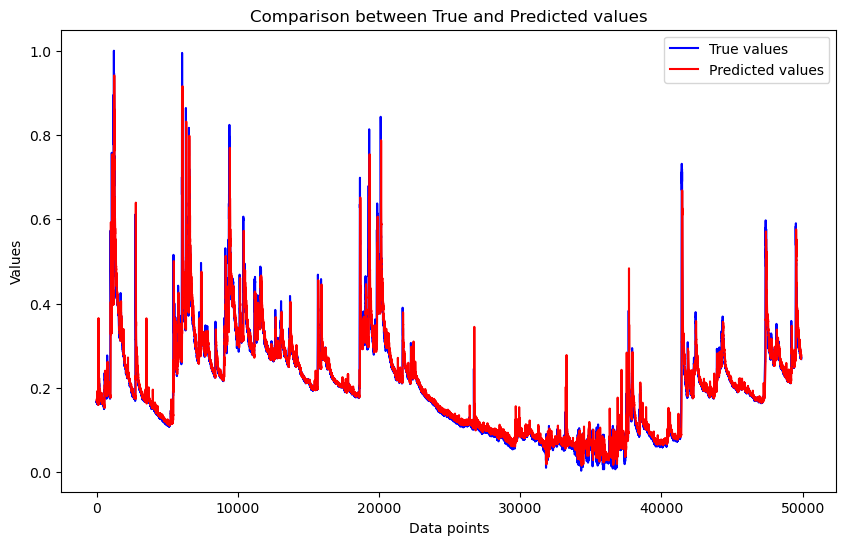

In [81]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(pred_Ridge_acomb_96in_32out, label='Predicted values', color='red')
plt.title('Comparison between True and Predicted values')
plt.xlabel('Data points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [82]:
def nse(y_test, pred_Ridge_acomb_96in_32out):
    numerator = np.sum((y_test - pred_Ridge_acomb_96in_32out) ** 2)
    denominator = np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - (numerator / denominator)

mse = mean_squared_error(y_test, pred_Ridge_acomb_96in_32out)
mae = mean_absolute_error(y_test, pred_Ridge_acomb_96in_32out)
nse_value = nse(y_test, pred_Ridge_acomb_96in_32out)

print("Performance metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"NSE: {nse_value}")

Performance metrics:
MSE: 0.0015715051857647874
MAE: 0.014885830085893772
NSE: 0.889775932233848


In [83]:
grid_Ridge_acomb_96in_32out_1 = Ridge()
grid_Ridge_acomb_96in_32out = GridSearchCV(grid_Ridge_acomb_96in_32out_1, ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
grid_Ridge_acomb_96in_32out.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10]},
             scoring='neg_mean_squared_error')

In [84]:
best_ridge_params = grid_Ridge_acomb_96in_32out.best_params_
print("Best Ridge Parameters:", best_ridge_params)

Best Ridge Parameters: {'alpha': 0.1}


In [85]:
tuned_Ridge_acomb_96in_32out = Ridge(alpha=0.1)

In [86]:
tuned_Ridge_acomb_96in_32out.fit(X_train, y_train)

Ridge(alpha=0.1)

In [87]:
pred_tuned_ridge_acomb_96in_32out = tuned_Ridge_acomb_96in_32out.predict(X_test)

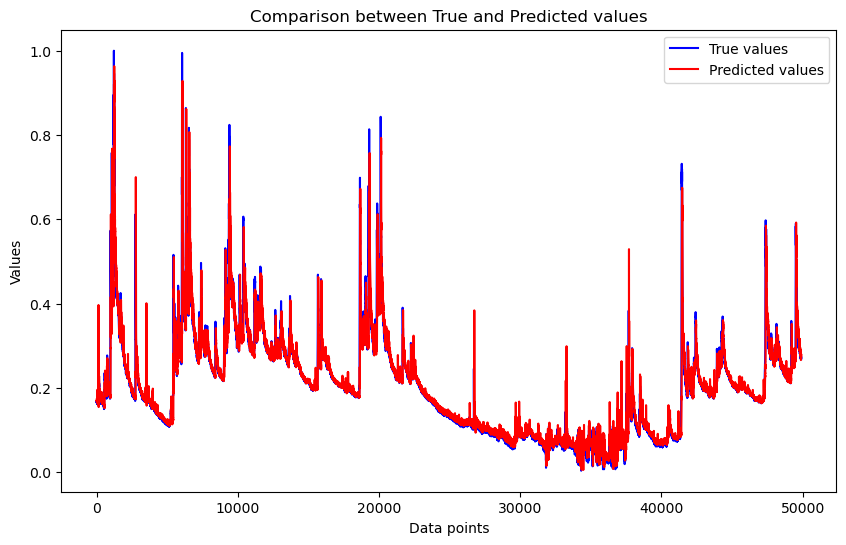

In [88]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(pred_tuned_ridge_acomb_96in_32out, label='Predicted values', color='red')
plt.title('Comparison between True and Predicted values')
plt.xlabel('Data points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [89]:
def nse(y_test, pred_tuned_ridge_acomb_96in_32out):
    numerator = np.sum((y_test - pred_tuned_ridge_acomb_96in_32out) ** 2)
    denominator = np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - (numerator / denominator)

mse = mean_squared_error(y_test, pred_tuned_ridge_acomb_96in_32out)
mae = mean_absolute_error(y_test, pred_tuned_ridge_acomb_96in_32out)
nse_value = nse(y_test, pred_tuned_ridge_acomb_96in_32out)

print("Performance metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"NSE: {nse_value}")

Performance metrics:
MSE: 0.0015634928445888573
MAE: 0.0149499588791649
NSE: 0.8903379111854551


In [ ]:
cv_scores_acomb_96in_16out_Ridge

In [90]:
window_size = 96
future_steps = 16

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [91]:
Ridge_acomb_96in_16out = Ridge()
Ridge_acomb_96in_16out.fit(X_train, y_train)

Ridge()

In [92]:
pred_Ridge_acomb_96in_16out = Ridge_acomb_96in_16out.predict(X_test)

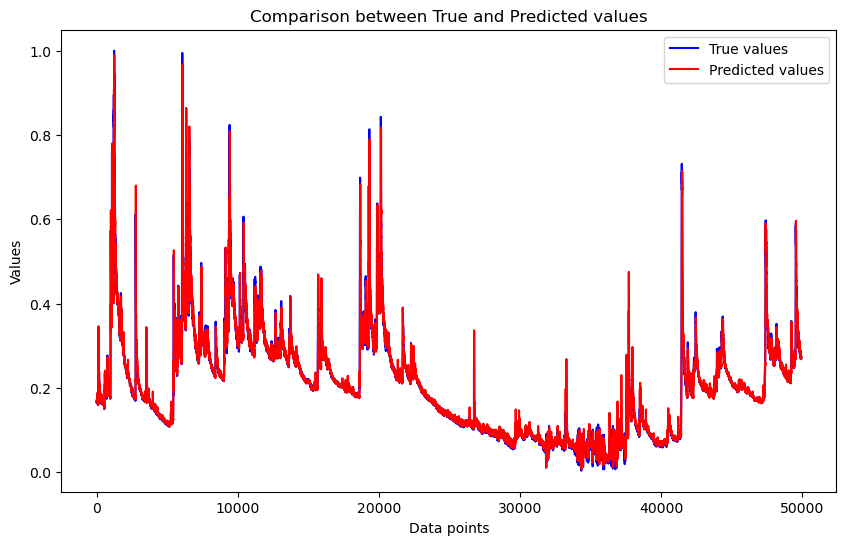

In [93]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(pred_Ridge_acomb_96in_16out, label='Predicted values', color='red')
plt.title('Comparison between True and Predicted values')
plt.xlabel('Data points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [94]:
def nse(y_test, pred_Ridge_acomb_96in_16out):
    numerator = np.sum((y_test - pred_Ridge_acomb_96in_16out) ** 2)
    denominator = np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - (numerator / denominator)

mse = mean_squared_error(y_test, pred_Ridge_acomb_96in_16out)
mae = mean_absolute_error(y_test, pred_Ridge_acomb_96in_16out)
nse_value = nse(y_test, pred_Ridge_acomb_96in_16out)

print("Performance metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"NSE: {nse_value}")

Performance metrics:
MSE: 0.0006263246762176619
MAE: 0.009139296940514784
NSE: 0.9560573577320685


In [95]:
grid_Ridge_acomb_96in_16out_1 = Ridge()
grid_Ridge_acomb_96in_16out = GridSearchCV(grid_Ridge_acomb_96in_16out_1, ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
grid_Ridge_acomb_96in_16out.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10]},
             scoring='neg_mean_squared_error')

In [96]:
best_ridge_params = grid_Ridge_acomb_96in_16out.best_params_
print("Best Ridge Parameters:", best_ridge_params)

Best Ridge Parameters: {'alpha': 0.1}


In [97]:
tuned_Ridge_acomb_96in_16out = Ridge(alpha=0.1)
tuned_Ridge_acomb_96in_16out.fit(X_train, y_train)

Ridge(alpha=0.1)

In [98]:
pred_tuned_ridge_acomb_96in_16out = tuned_Ridge_acomb_96in_16out.predict(X_test)

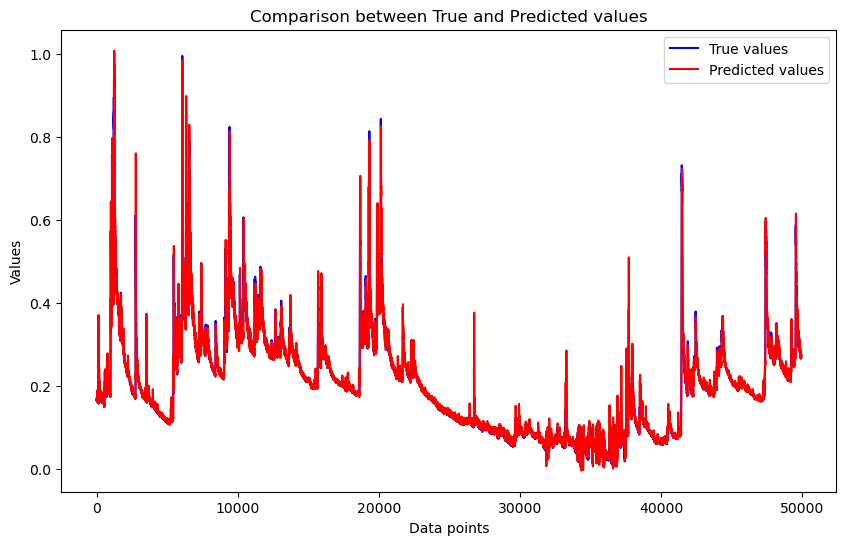

In [99]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(pred_tuned_ridge_acomb_96in_16out, label='Predicted values', color='red')
plt.title('Comparison between True and Predicted values')
plt.xlabel('Data points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [100]:
def nse(y_test, pred_tuned_ridge_acomb_96in_16out):
    numerator = np.sum((y_test - pred_tuned_ridge_acomb_96in_16out) ** 2)
    denominator = np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - (numerator / denominator)

mse = mean_squared_error(y_test, pred_tuned_ridge_acomb_96in_16out)
mae = mean_absolute_error(y_test, pred_tuned_ridge_acomb_96in_16out)
nse_value = nse(y_test, pred_tuned_ridge_acomb_96in_16out)

print("Performance metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"NSE: {nse_value}")

Performance metrics:
MSE: 0.0006196034153466907
MAE: 0.00930179664262828
NSE: 0.9565289182074216


In [ ]:
cv_scores_acomb_96in_8out_Ridge

In [101]:
window_size = 96
future_steps = 8

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [102]:
Ridge_acomb_96in_8out = Ridge()
Ridge_acomb_96in_8out.fit(X_train, y_train)

Ridge()

In [103]:
pred_Ridge_acomb_96in_8out = Ridge_acomb_96in_8out.predict(X_test)

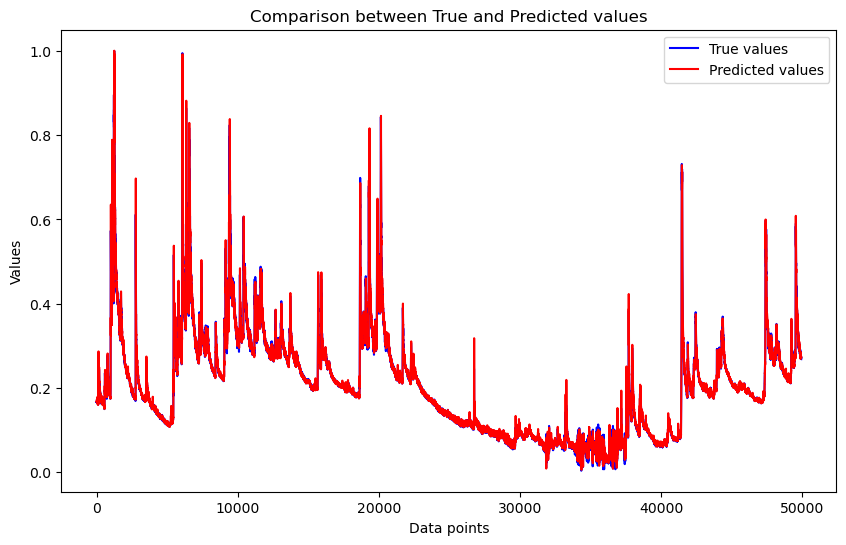

In [104]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(pred_Ridge_acomb_96in_8out, label='Predicted values', color='red')
plt.title('Comparison between True and Predicted values')
plt.xlabel('Data points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [105]:
def nse(y_test, pred_Ridge_acomb_96in_8out):
    numerator = np.sum((y_test - pred_Ridge_acomb_96in_8out) ** 2)
    denominator = np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - (numerator / denominator)

mse = mean_squared_error(y_test, pred_Ridge_acomb_96in_8out)
mae = mean_absolute_error(y_test, pred_Ridge_acomb_96in_8out)
nse_value = nse(y_test, pred_Ridge_acomb_96in_8out)

print("Performance metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"NSE: {nse_value}")

Performance metrics:
MSE: 0.00023125565436909977
MAE: 0.005880024621852679
NSE: 0.9837728664087602


In [106]:
grid_Ridge_acomb_96in_8out_1 = Ridge()
grid_Ridge_acomb_96in_8out = GridSearchCV(grid_Ridge_acomb_96in_8out_1, ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
grid_Ridge_acomb_96in_8out.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10]},
             scoring='neg_mean_squared_error')

In [107]:
best_ridge_params = grid_Ridge_acomb_96in_8out.best_params_
print("Best Ridge Parameters:", best_ridge_params)

Best Ridge Parameters: {'alpha': 0.1}


In [108]:
tuned_Ridge_acomb_96in_8out = Ridge(alpha=0.1)
tuned_Ridge_acomb_96in_8out.fit(X_train, y_train)

Ridge(alpha=0.1)

In [112]:
pred_tuned_ridge_acomb_96in_8out = tuned_Ridge_acomb_96in_8out.predict(X_test)

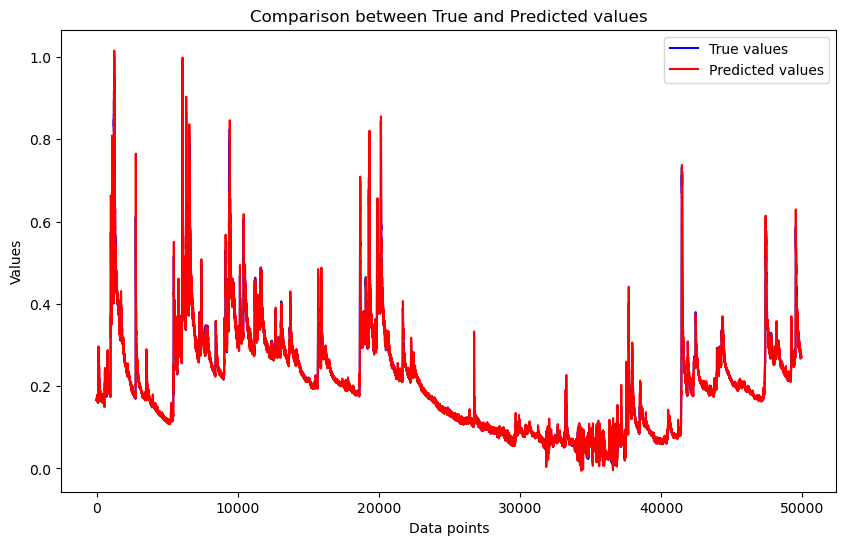

In [113]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(pred_tuned_ridge_acomb_96in_8out, label='Predicted values', color='red')
plt.title('Comparison between True and Predicted values')
plt.xlabel('Data points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [114]:
def nse(y_test, pred_tuned_ridge_acomb_96in_8out):
    numerator = np.sum((y_test - pred_tuned_ridge_acomb_96in_8out) ** 2)
    denominator = np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - (numerator / denominator)

mse = mean_squared_error(y_test, pred_tuned_ridge_acomb_96in_8out)
mae = mean_absolute_error(y_test, pred_tuned_ridge_acomb_96in_8out)
nse_value = nse(y_test, pred_tuned_ridge_acomb_96in_8out)

print("Performance metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"NSE: {nse_value}")

Performance metrics:
MSE: 0.0002305773971852256
MAE: 0.006092865567534126
NSE: 0.9838204594934005


In [121]:
from joblib import dump
dump(Ridge_acomb_96in_8out, 'Ridge_acomb_96in_8out.joblib')

['Ridge_acomb_96in_8out.joblib']

In [122]:
dump(grid_Ridge_acomb_96in_48out, 'grid_Ridge_acomb_96in_48out.joblib')

['grid_Ridge_acomb_96in_48out.joblib']

In [123]:
dump(Ridge_acomb_96in_48out, 'Ridge_acomb_96in_48out.joblib')

['Ridge_acomb_96in_48out.joblib']

In [124]:
dump(grid_Ridge_acomb_96in_32out, 'grid_Ridge_acomb_96in_32out.joblib')

['grid_Ridge_acomb_96in_32out.joblib']

In [125]:
dump(Ridge_acomb_96in_32out, 'Ridge_acomb_96in_32out.joblib')

['Ridge_acomb_96in_32out.joblib']

In [126]:
dump(grid_Ridge_acomb_96in_16out, 'grid_Ridge_acomb_96in_16out.joblib')

['grid_Ridge_acomb_96in_16out.joblib']

In [127]:
dump(Ridge_acomb_96in_16out, 'Ridge_acomb_96in_16out.joblib')

['Ridge_acomb_96in_16out.joblib']

In [128]:
dump(grid_Ridge_acomb_96in_8out, 'grid_Ridge_acomb_96in_8out.joblib')

['grid_Ridge_acomb_96in_8out.joblib']